<a href="https://colab.research.google.com/github/lusanmanso/lusanmanso.collab.io/blob/main/StudentLab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Lab: Week 5

Note: This practical session is based on the exercises in section 3.7.10 and 3.7.11

First, let's install the packages that we will use in this lab

For these exercises we use the numpy library in version 1.22, which is compatible with the ISLP library.

In [ ]:
#!pip install --force-reinstall -v "numpy==1.22"
!pip install ISLP

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 39.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 926.4/926.4 kB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 7.0 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=776b5664cf40a097e4a6f5a0051626b72372d6dfe01ed494482dceccf734c871
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
  Attempting un

In [ ]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
import statsmodels.formula.api as smf
from ISLP.models import (ModelSpec as MS, summarize , poly)
from ISLP import load_data

import math

If you are using Google Colab, after installing the above packages, restart the terminal.

# 3.7.10 - Carseats Dataset

source: https://rdrr.io/cran/ISLR/man/Carseats.html

1 - Fit a multiple regression model to predict Sales using Price,
Urban, and US.

In [ ]:
car = load_data("Carseats")
car.columns

car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    float64 
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    category
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    category
 10  US           400 non-null    category
dtypes: category(3), float64(1), int64(7)
memory usage: 26.7 KB


In [ ]:
print(car[['Sales', 'Price']].corr())
# print(car.corr()) Esta claramente no funciona

          Sales     Price
Sales  1.000000 -0.444951
Price -0.444951  1.000000


2 - Provide an interpretation of each coefficient in the model. Be
careful—some of the variables in the model are qualitative!

In [ ]:
"""
L - Voy ahora a empezar a convertir todas las columans correctamente en variables cuantitativas.
Sino no se puede ver la correlación entre todas
LO SIGUIENTE SE LLAMA LABEL-ENCODING
"""

In [ ]:
car['Urban'] = car['Urban'].astype(str)
# Creación de un filtro
filter1 = car['Urban'] == 'Yes'
# car[filter1]

filter2 = car['Urban'] == 'No'
# car[filter2]

# Añado un 1
car.loc[filter1, 'Urban'] = 1
car.loc[filter2, 'Urban'] = 0

car.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,1,Yes
1,11.22,111,48,16,260,83,Good,65,10,1,Yes
2,10.06,113,35,10,269,80,Medium,59,12,1,Yes
3,7.40,117,100,4,466,97,Medium,55,14,1,Yes
4,4.15,141,64,3,340,128,Bad,38,13,1,No


In [ ]:
# Hay una forma extra que es adquirible con dummies
dummy_Urban = pd.get_dummies(car['Urban'], prefix="Urban", dtype='int')
dummy_Urban.head()

In [ ]:
car['US'] = car['US'].astype(str)
# Creación de un filtro
filter1 = car['US'] == 'Yes'
filter2 = car['US'] == 'No'

car.loc[filter1, 'US'] = 1
car.loc[filter2, 'US'] = 0

car.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,1,1
1,11.22,111,48,16,260,83,Good,65,10,1,1
2,10.06,113,35,10,269,80,Medium,59,12,1,1
3,7.40,117,100,4,466,97,Medium,55,14,1,1
4,4.15,141,64,3,340,128,Bad,38,13,1,0


In [ ]:
# Hay una forma extra que es adquirible con dummies
dummy_US = pd.get_dummies(car['US'], dtype='int')
dummy_US.head()

In [ ]:
# Ahora con ambos dummies se puede mergear
car = car.join(dummy_US)
car = car.join(dummy_Urban)
car.head()

In [ ]:
car['ShelveLoc'] = car['ShelveLoc'].astype(str)
# Creación de un filtro
filter1 = car['ShelveLoc'] == 'Bad'
filter2 = car['ShelveLoc'] == 'Medium'
filter3 = car['ShelveLoc'] == 'Good'

# Añado un 1
car.loc[filter1, 'ShelveLoc'] = 0
car.loc[filter2, 'ShelveLoc'] = 1
car.loc[filter3, 'ShelveLoc'] = 2

car.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,2,65,10,1,1
2,10.06,113,35,10,269,80,1,59,12,1,1
3,7.40,117,100,4,466,97,1,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [ ]:
# Analizas la fuerza de la correlación
car.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,0.554458,-0.231815,-0.051955,-0.015419,0.177093
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,0.038549,-0.100239,0.025197,0.066594,0.016869
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.053465,-0.004670,-0.056855,0.037967,0.089601
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,0.056552,-0.004557,-0.033594,0.042035,0.684460
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.020614,-0.042663,-0.106378,-0.052025,0.060564
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,0.050924,-0.102177,0.011747,0.047016,0.057861
ShelveLoc,0.554458,0.038549,-0.053465,0.056552,-0.020614,0.050924,1.000000,0.014149,-0.025723,-0.075404,0.047378
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,0.014149,1.000000,0.006488,0.028479,0.008652
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,-0.025723,0.006488,1.000000,-0.033094,-0.078250
Urban,-0.015419,0.066594,0.037967,0.042035,-0.052025,0.047016,-0.075404,0.028479,-0.033094,1.000000,0.047085


3 - Write out the model in equation form, being careful to handle the qualitative variables properly.

In [ ]:
# ~ == "="
# smf.ols(formula, dataset o datos)
model = smf.ols('Sales ~ Urban + US + Price', data=car)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           2.39e-23
Time:                        14:09:41   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0435      0.651     20.036      0.0

In [ ]:
# Sales = 13.04 + 1.30*US(Yes) - 0.054*Price

In [ ]:
# Usar un heatmap de correlación de seaborn me ayuda siempre a saber
# que variables son las más útiles

In [ ]:
!pip install seaborn
import seaborn as sns

<Axes: >

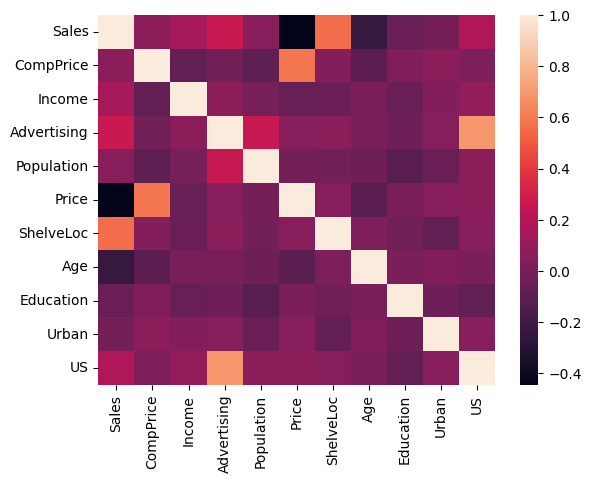

In [ ]:
sns.heatmap(car.corr())

4 - For which of the predictors can you reject the null hypothesis $H_0 : \beta_j =0$?

In [ ]:
"""
Basándonos en las correlaciones más fuertes (aquellas que se alejan más de 0), podemos rechazar la hipótesis nula para:

Price (correlación negativa fuerte)
Advertising (correlación positiva fuerte)
Income (correlación positiva fuerte)
CompPrice (correlación positiva moderada)

Estas variables muestran las correlaciones más fuertes con Sales y, por lo tanto, son las que más probablemente nos permitirían rechazar la hipótesis nula de que su coeficiente β es igual a 0.
"""

5 - On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

In [ ]:
# Fit a smaller model with only Price, ShelveLoc, and Advertising
model_smol = smf.ols('Sales ~ Price + ShelveLoc + Advertising', data=car)
smol_results = model_smol.fit()
print(smol_results.summary())
# El R^2 ha mejorado

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     153.5
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           4.48e-79
Time:                        14:10:01   Log-Likelihood:                -794.81
No. Observations:                 400   AIC:                             1600.
Df Residuals:                     395   BIC:                             1620.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         11.4680      0.471     24.

In [ ]:
# One Hot Encoding
car = pd.get_dummies(car, drop_first=False)
car

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_0,ShelveLoc_1,ShelveLoc_2,Urban_0,Urban_1,US_0,US_1
0,9.50,138,73,11,276,120,42,17,True,False,False,False,True,False,True
1,11.22,111,48,16,260,83,65,10,False,False,True,False,True,False,True
2,10.06,113,35,10,269,80,59,12,False,True,False,False,True,False,True
3,7.40,117,100,4,466,97,55,14,False,True,False,False,True,False,True
4,4.15,141,64,3,340,128,38,13,True,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,False,False,True,False,True,False,True
396,6.14,139,23,3,37,120,55,11,False,True,False,True,False,False,True
397,7.41,162,26,12,368,159,40,18,False,True,False,False,True,False,True
398,5.94,100,79,7,284,95,50,12,True,False,False,False,True,False,True


In [ ]:
results.params

,0
Intercept,13.043469
Urban[T.1],-0.021916
US[T.1],1.200573
Price,-0.054459


6 - How well do the models in Questions 1 and 5 fit the data? (Use Residual standard error and $R^2$ formulas)



In [ ]:
model = smf.ols('Sales ~ Price + US + Urban', data=car)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           2.39e-23
Time:                        14:10:15   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0435      0.651     20.036      0.0

In [ ]:
X = pd.DataFrame({'Intercept': [13.0308 for _ in range(0, len(car))], # Changed range[0, len(car)] to range(0, len(car))
                  'US': car['US'],
                  'Price': car['Price'],
                  'Urban': car['Urban']})

y_true = np.array(car['Sales'])
y_pred = np.array(results.predict(X))

# Calculo de RSS
RSS = np.sum(np.square(y_true - y_pred))
# Calculo de RSE
rse = math.sqrt(RSS / (len(y_true) - 2))
print(rse)

# Para R^2
TSS = np.sum(np.square(y_true - np.mean(y_true)))
R2 = 1 - (RSS / TSS)
print(R2) # Esto también te lo da la tabla Summary

2.466272323648211
0.23927539218405547


In [ ]:
# https://stackoverflow.com/questions/63333999/residual-standard-error-of-a-regression-in-python
np.sqrt(results.scale)

2.4724924402701642

7 - Using the model from Question 6, obtain 95% confidence intervals for the coefficient(s).

In [ ]:
results.conf_int(alpha=0.05)

,0,1
Intercept,11.763597,14.323341
US[T.1],0.691304,1.709841
Urban[T.1],-0.555973,0.512141
Price,-0.064764,-0.044154


8 - Is there evidence of outliers or high leverage observations in the model from Question 5?

In [ ]:
# Usando prueba estadística de Bonferroni para identificar outliers
test = results.outlier_test(alpha=0.05)
test = [test['bonf(p)']<0.05]
print(test)

[0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Name: bonf(p), Length: 400, dtype: bool]


# 3.7.11 - Random Dataset

In [ ]:
rng = np.random.default_rng(1) # Generador de numeros random con seed 1
x = rng.normal(size=100) # 100 valores
y = 2 * x + rng.normal(size=100)

1 - Perform a simple linear regression of y onto x, without an intercept. Report the coefficient estimate $\hat{\beta}$, the standard error of this coefficient estimate, and the t-statistic and p-value associated with the null hypothesis $H_0 : \beta = 0$. Comment on these results. (You can perform regression without an intercept using the keywords argument intercept=False to ModelSpec().)

In [ ]:
# ANTES QUE NADA > Crear un dataframe
df = pd.DataFrame({'x': x, 'y': y})

df

,x,y
0,0.345584,0.039887
1,0.821618,2.505681
2,0.330437,0.535282
3,-1.303157,-1.937161
4,0.905356,3.029555
...,...,...
95,-2.250854,-6.119176
96,-0.138655,0.832327
97,0.033000,0.234106
98,-1.425349,-2.302292


In [ ]:
""" Forma errónea porque no he descartado el intercepto
model = sm.OLS(df['y'], df['x'])
results = model.fit()
print(results.summary())
"""

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Sun, 08 Dec 2024   Prob (F-statistic):                    6.23e-31
Time:                        12:42:26   Log-Likelihood:                         -141.35
No. Observations:                 100   AIC:                                      284.7
Df Residuals:                      99   BIC:                                      287.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
# FORMA CORRECTA
design = MS(['x'], intercept=False)
design = design.fit(df)
X = design.transform(df) # Creacion X
y = df['y'] # Asignacion y
# Ahora si:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Sun, 08 Dec 2024   Prob (F-statistic):                    6.23e-31
Time:                        14:11:54   Log-Likelihood:                         -141.35
No. Observations:                 100   AIC:                                      284.7
Df Residuals:                      99   BIC:                                      287.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

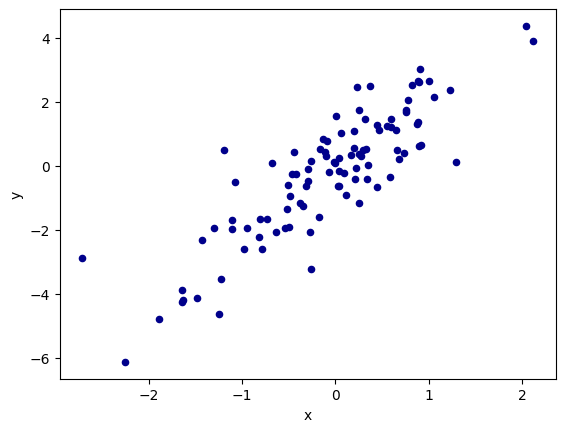

In [ ]:
#vamos plotar os dados para verificar a relação linear
ax1 = df.plot.scatter(x='x',
                      y='y',
                      c='DarkBlue')

2 - Now perform a simple linear regression of x onto y without an intercept, and report the coefficient estimate, its standard error, and the corresponding t-statistic and p-values associated with the null hypothesis H0 : β = 0. Comment on these results.

In [ ]:
model = sm.OLS(X, y)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      x   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Sun, 08 Dec 2024   Prob (F-statistic):                    6.23e-31
Time:                        14:11:57   Log-Likelihood:                         -58.349
No. Observations:                 100   AIC:                                      118.7
Df Residuals:                      99   BIC:                                      121.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

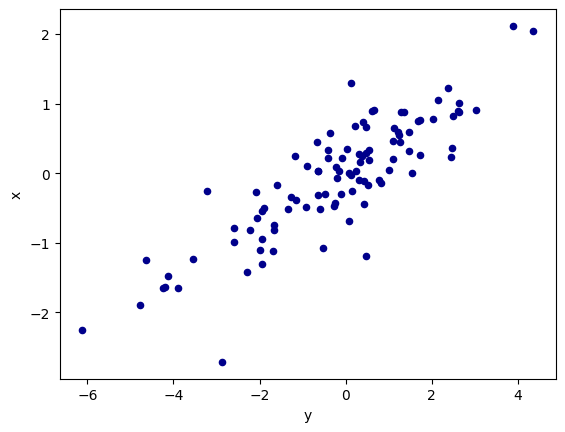

In [ ]:
ax1 = df.plot.scatter(x='y',
                      y='x',
                      c='DarkBlue')

3 - What is the relationship between the results obtained in (1) and (2)?

In [ ]:
"""
El coeficiente (la pendiente | slope) cambia cuando x e y mudan
A pesar de que los modelos son diferentes, la curva es la misma
"""